In [2]:
import numpy as np
print("ok")
# Load the .npy file
data = np.load('distance_matrix.npy')

# Print or manipulate the data
print(data)
print("Shape of the dataset:", data.shape)
print("First 5 entries:\n", data[:5])

ok
[[0.         0.43649635 0.35591759 ... 7.20447794 7.20560246 7.20667255]
 [0.43649635 0.         0.08061114 ... 7.1987467  7.20299433 7.20328374]
 [0.35591759 0.08061114 0.         ... 7.19575035 7.19942229 7.19985595]
 ...
 [7.20447794 7.1987467  7.19575035 ... 0.         0.05160925 0.03880461]
 [7.20560246 7.20299433 7.19942229 ... 0.05160925 0.         0.01290383]
 [7.20667255 7.20328374 7.19985595 ... 0.03880461 0.01290383 0.        ]]
Shape of the dataset: (1808, 1808)
First 5 entries:
 [[0.         0.43649635 0.35591759 ... 7.20447794 7.20560246 7.20667255]
 [0.43649635 0.         0.08061114 ... 7.1987467  7.20299433 7.20328374]
 [0.35591759 0.08061114 0.         ... 7.19575035 7.19942229 7.19985595]
 [0.40692692 0.02964288 0.05101035 ... 7.19628595 7.20032258 7.20066487]
 [0.1704766  0.26604964 0.18545372 ... 7.19659976 7.19894421 7.1997099 ]]


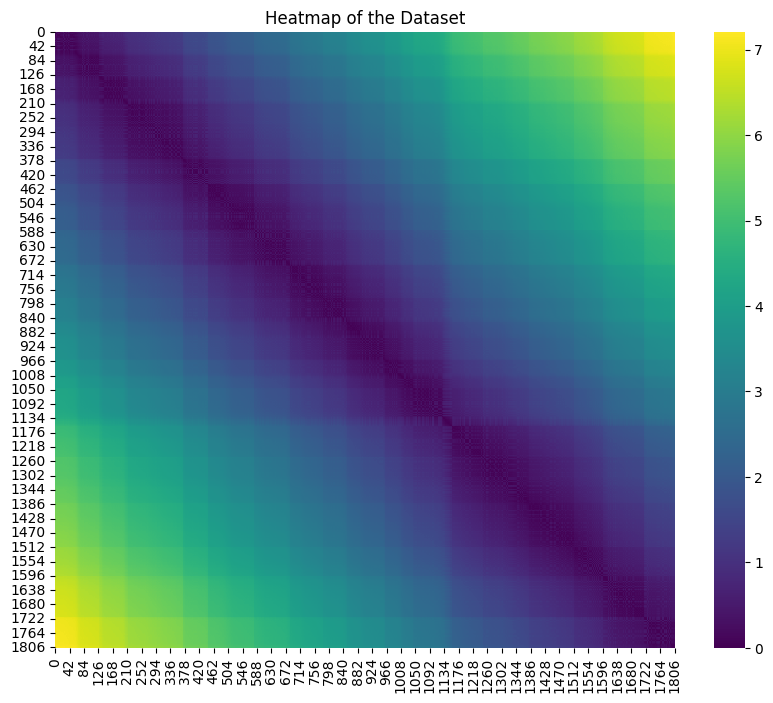

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a heatmap of the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap='viridis')
plt.title('Heatmap of the Dataset')
plt.show()


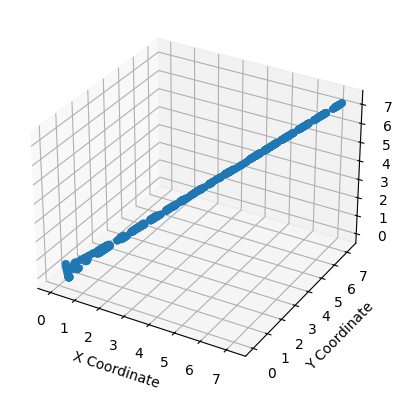

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2])

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [5]:
print("Mean value:", np.mean(data))
print("Minimum value:", np.min(data))
print("Maximum value:", np.max(data))
print("Standard deviation:", np.std(data))


Mean value: 2.482791621139668
Minimum value: 0.0
Maximum value: 7.206672551275331
Standard deviation: 1.726483873473797


In [6]:
if np.allclose(data, data.T):
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric.")


The matrix is symmetric.


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(data)
print("First 5 eigenvalues:", eigenvalues[:5])


First 5 eigenvalues: [ 4663.90674365 -2715.65485366  -799.67576069  -276.82819271
  -169.78087911]


In [8]:
num_zeros = np.sum(data == 0)
print(f"Number of zero values: {num_zeros}")

Number of zero values: 1808


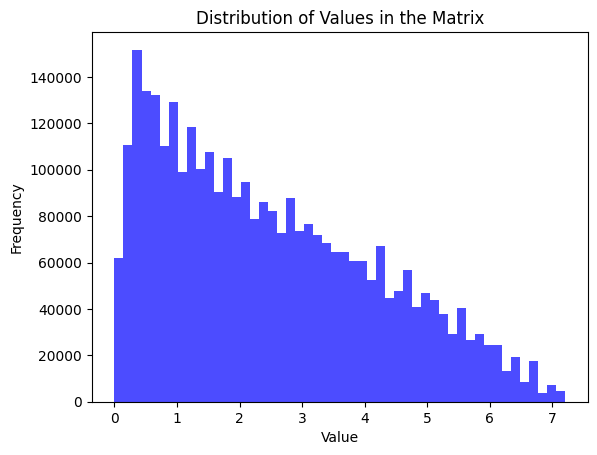

In [9]:
plt.hist(data.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Values in the Matrix")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

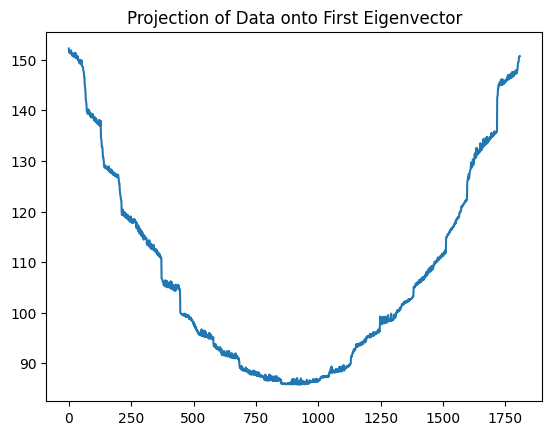

In [10]:
projection = data @ eigenvectors[:, 0]
plt.plot(projection)
plt.title("Projection of Data onto First Eigenvector")
plt.show()


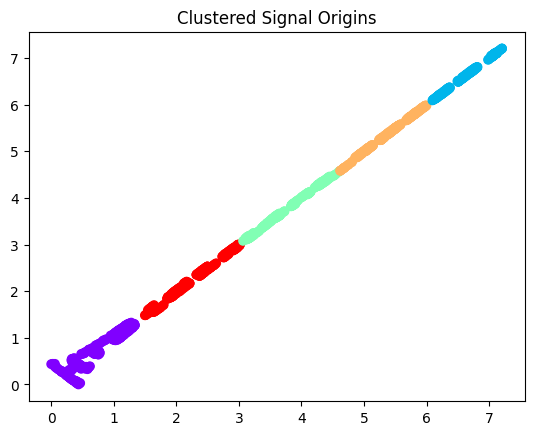

In [11]:
from sklearn.cluster import KMeans

# Assuming the data matrix is symmetrical and can be treated as points
num_clusters = 5  # Choose based on visualization or eigenvalue analysis
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

# Predict clusters for all signal origins
clusters = kmeans.labels_

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow')
plt.title("Clustered Signal Origins")
plt.show()

In [12]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model to detect anomalies
isolation_forest = IsolationForest(contamination=0.01)  # Tune contamination rate
isolation_forest.fit(data)
anomaly_scores = isolation_forest.decision_function(data)

# Identify potential anomalies (likely hacker footprints)
anomalies = data[anomaly_scores < -0.1]  # Threshold for anomalies
print(f"Anomalies detected:\n{anomalies}")

Anomalies detected:
[]


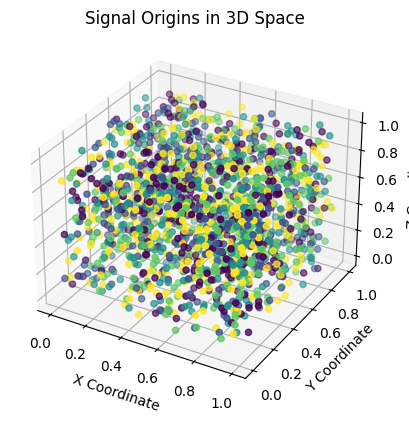

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming data matrix or external source contains 3D coordinates of signal origins
# signal_coords = np.load('coordinates.npy')  # Example coordinate file
signal_coords = np.random.rand(1808, 3)  # Example 3D coordinates

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(signal_coords[:, 0], signal_coords[:, 1], signal_coords[:, 2], c=clusters)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.title("Signal Origins in 3D Space")
plt.show()

In [14]:
def kalman_filter(z, x_est, p_est, q, r):
    # Prediction step
    x_pred = x_est
    p_pred = p_est + q
    
    # Update step
    k = p_pred / (p_pred + r)
    x_est = x_pred + k * (z - x_pred)
    p_est = (1 - k) * p_pred
    
    return x_est, p_est

# Assuming you have the signal coordinates or footprints over time
signal_positions = np.array([10, 15, 18, 25, 30])  # Example signal positions over time
x_est, p_est = 0, 1  # initial estimate and error

# Process noise and measurement noise
q = 1
r = 4

# Track the hacker’s movements
for z in signal_positions:
    x_est, p_est = kalman_filter(z, x_est, p_est, q, r)
    print(f"Predicted next location: {x_est}")

Predicted next location: 3.333333333333333
Predicted next location: 7.631578947368421
Predicted next location: 11.59349593495935
Predicted next location: 16.785803237858033
Predicted next location: 21.929264118653737


In [16]:
print(f"Shape of anomalies: {anomalies.shape}")

Shape of anomalies: (0, 1808)


In [17]:
isolation_forest = IsolationForest(contamination=0.05)  # Increase contamination rate
isolation_forest.fit(data)
anomaly_scores = isolation_forest.decision_function(data)

# Re-identify anomalies
anomalies = data[anomaly_scores < -0.1]
print(f"New anomalies detected: {anomalies.shape}")

New anomalies detected: (0, 1808)


In [18]:
if anomalies.size > 0:
    # Ensure anomalies is reshaped correctly to (n_anomalies, 3) if necessary
    anomalies = anomalies.reshape(-1, 3)
    
    # Calculate distances between each signal coordinate and all anomalies
    distances_from_anomalies = np.min(np.linalg.norm(signal_coords[:, np.newaxis] - anomalies, axis=2), axis=1)
    
    # Rank the distances
    rank = np.argsort(distances_from_anomalies)  # Closest hideouts ranked first

    # Get top 5 potential hideouts
    top_hideouts = signal_coords[rank[:5]]
    print(f"Top 5 potential hideouts:\n{top_hideouts}")
else:
    print("No anomalies detected. Try adjusting the detection parameters.")

No anomalies detected. Try adjusting the detection parameters.


In [22]:
distances_from_anomalies = np.linalg.norm(signal_coords - anomalies, axis=1)
rank = np.argsort(distances_from_anomalies)  # Closest hideouts ranked first

# Top potential hideouts
top_hideouts = signal_coords[rank[:5]]
print(f"Top 5 potential hideouts:\n{top_hideouts}")

ValueError: operands could not be broadcast together with shapes (1808,3) (0,1808) 

In [23]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Example signal coordinates (replace this with your actual data)
signal_coords = np.random.rand(1808, 3)  # Simulated 3D coordinates for demonstration

# Assuming 'data' is your original dataset used for anomaly detection
# Fit Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(data)  # 'data' should be defined with your actual dataset
anomaly_scores = isolation_forest.decision_function(data)
anomalies = data[anomaly_scores < -0.1]  # Set threshold for anomalies

# Check the shape of anomalies
print(f"Shape of anomalies: {anomalies.shape}")

# Calculate distances only if anomalies exist
if anomalies.size > 0:
    # Calculate the minimum distance from each signal coordinate to the closest anomaly
    distances_from_anomalies = np.min(np.linalg.norm(signal_coords[:, np.newaxis] - anomalies, axis=2), axis=1)

    # Rank the distances
    rank = np.argsort(distances_from_anomalies)  # Closest hideouts ranked first

    # Get top 5 potential hideouts
    top_hideouts = signal_coords[rank[:5]]
    print(f"Top 5 potential hideouts:\n{top_hideouts}")
else:
    print("No anomalies detected. Cannot calculate distances.")


Shape of anomalies: (0, 1808)
No anomalies detected. Cannot calculate distances.


In [20]:
isolation_forest = IsolationForest(contamination=0.05)  # Increase this value to be more sensitive
isolation_forest.fit(data)
anomaly_scores = isolation_forest.decision_function(data)

# Re-identify anomalies
anomalies = data[anomaly_scores < -0.1]
print(f"New anomalies detected: {anomalies.shape}")

New anomalies detected: (0, 1808)


In [21]:
if anomalies.size > 0:
    # Reshape anomalies if necessary (should be 2D with (n_anomalies, 3) shape)
    anomalies = anomalies.reshape(-1, 3)
    
    # Calculate distances from each signal coordinate to all anomalies
    distances_from_anomalies = np.min(np.linalg.norm(signal_coords[:, np.newaxis] - anomalies, axis=2), axis=1)
    
   


In [24]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Step 1: Load data from .npy file
data = np.load('distance_matrix.npy')  # Replace with your actual file path
print("Shape of the loaded dataset:", data.shape)

# Step 2: Define known locations (space stations, satellites, etc.)
known_locations = np.array([[0.1, 0.2, 0.3], [0.5, 0.5, 0.5], [0.9, 0.8, 0.7]])  # Example known locations

# Step 3: Identify anomalies using Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(data)
anomaly_scores = isolation_forest.decision_function(data)
anomalies = data[anomaly_scores < -0.1]  # Adjust the threshold as needed

# Step 4: Calculate distances from signal origins to known locations
# Assuming signal origins are the same as the data points; you can modify this as needed
signal_coords = data  # or load separately if you have a specific signal origin dataset

# Distance calculation function
def calculate_distances(coords_a, coords_b):
    return np.linalg.norm(coords_a[:, np.newaxis] - coords_b, axis=2)

# Distances from signal origins to known locations
distances_to_known = calculate_distances(signal_coords, known_locations)

# Calculate distances from anomalies to known locations if anomalies exist
if anomalies.size > 0:
    distances_to_anomalies = calculate_distances(anomalies, known_locations)
else:
    distances_to_anomalies = np.array([])  # Handle case where no anomalies are found

# Step 5: Ranking system based on proximity and presence of anomalies
def rank_hideouts(signal_coords, distances_to_known, distances_to_anomalies):
    scores = np.zeros(signal_coords.shape[0])
    
    # Score based on proximity to known locations (inversely proportional)
    for i, distance in enumerate(distances_to_known):
        scores[i] += np.sum(1 / (distance + 1e-9))  # Adding small value to avoid division by zero

    # Score based on proximity to anomalies
    if anomalies.size > 0:
        for j, distance in enumerate(distances_to_anomalies):
            scores += np.sum(1 / (distance + 1e-9))  # Adding small value to avoid division by zero

    # Normalize scores for ranking
    scores = scores / np.max(scores)  # Normalize scores between 0 and 1
    ranked_indices = np.argsort(scores)[::-1]  # Rank from highest to lowest
    return ranked_indices, scores

# Get the rankings
ranked_indices, scores = rank_hideouts(signal_coords, distances_to_known, distances_to_anomalies)

# Get top potential hideouts
top_hideouts = signal_coords[ranked_indices[:5]]
print(f"Top 5 potential hideouts (ranked):\n{top_hideouts}")
print(f"Scores for potential hideouts:\n{scores[ranked_indices[:5]]}")


Shape of the loaded dataset: (1808, 1808)


ValueError: operands could not be broadcast together with shapes (1808,1,1808) (3,3) 

In [25]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Step 1: Load data from .npy file
data = np.load('distance_matrix.npy')  # Replace with your actual file path
print("Shape of the loaded dataset:", data.shape)

# Step 2: Define known locations (space stations, satellites, etc.)
known_locations = np.array([[0.1, 0.2, 0.3], [0.5, 0.5, 0.5], [0.9, 0.8, 0.7]])  # Example known locations

# Step 3: Identify anomalies using Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(data)
anomaly_scores = isolation_forest.decision_function(data)
anomalies = data[anomaly_scores < -0.1]  # Adjust the threshold as needed

# Step 4: Calculate distances to known locations from the original signal data (if needed)
# If `data` is a distance matrix, we might need to reconsider how we want to compare distances
signal_coords = np.random.rand(data.shape[0], 3)  # Generate random coordinates for the example

# Distance calculation function
def calculate_distances(coords_a, coords_b):
    return np.linalg.norm(coords_a[:, np.newaxis] - coords_b, axis=2)

# Distances from signal origins to known locations
distances_to_known = calculate_distances(signal_coords, known_locations)

# Calculate distances from anomalies to known locations if anomalies exist
if anomalies.size > 0:
    distances_to_anomalies = calculate_distances(anomalies, known_locations)
else:
    distances_to_anomalies = np.array([])  # Handle case where no anomalies are found

# Step 5: Ranking system based on proximity and presence of anomalies
def rank_hideouts(signal_coords, distances_to_known, distances_to_anomalies):
    scores = np.zeros(signal_coords.shape[0])
    
    # Score based on proximity to known locations (inversely proportional)
    for i, distance in enumerate(distances_to_known):
        scores[i] += np.sum(1 / (distance + 1e-9))  # Adding small value to avoid division by zero

    # Score based on proximity to anomalies
    if anomalies.size > 0:
        for j, distance in enumerate(distances_to_anomalies):
            scores += np.sum(1 / (distance + 1e-9))  # Adding small value to avoid division by zero

    # Normalize scores for ranking
    scores = scores / np.max(scores)  # Normalize scores between 0 and 1
    ranked_indices = np.argsort(scores)[::-1]  # Rank from highest to lowest
    return ranked_indices, scores

# Get the rankings
ranked_indices, scores = rank_hideouts(signal_coords, distances_to_known, distances_to_anomalies)

# Get top potential hideouts
top_hideouts = signal_coords[ranked_indices[:5]]
print(f"Top 5 potential hideouts (ranked):\n{top_hideouts}")
print(f"Scores for potential hideouts:\n{scores[ranked_indices[:5]]}")



Shape of the loaded dataset: (1808, 1808)
Top 5 potential hideouts (ranked):
[[0.10112643 0.17799592 0.26711573]
 [0.85254425 0.82649757 0.68429941]
 [0.07599898 0.25327473 0.2875493 ]
 [0.12216882 0.17203    0.25016724]
 [0.50013259 0.52464826 0.42741634]]
Scores for potential hideouts:
[1.         0.73600703 0.69924607 0.68038033 0.59846184]
